<a href="https://colab.research.google.com/github/nafilahhans/ML-A11.2023.15202-UAS/blob/main/Prediksi_Risiko_Penyakit_Jantung_Berdasarkan_Data_Klinis_Menggunakan_Model_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Risiko Penyakit Jantung Berdasarkan Data Klinis Menggunakan Model Logistic Regression

**Nama :** [HANI NAFILAH]  
**Nim :** [A11.2023.15202]  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 1. Pendahuluan

### 1.1. Ringkasan Permasalahan

Penyakit jantung merupakan salah satu penyebab kematian paling tinggi di dunia. Banyak kasus terjadi akibat faktor-faktor seperti tekanan darah tinggi, kadar kolesterol tinggi, diabetes, dan pola hidup tidak sehat. Deteksi dini terhadap risiko penyakit jantung sangat penting untuk mencegah komplikasi yang lebih serius.

Dalam era digital, penggunaan data klinis pasien seperti usia, tekanan darah, denyut jantung maksimum, kadar kolesterol, dan hasil EKG dapat dimanfaatkan untuk memprediksi risiko penyakit jantung secara otomatis dengan bantuan machine learning.

### 1.2. Tujuan

1. Membangun model prediktif untuk mengklasifikasikan apakah seorang pasien memiliki risiko penyakit jantung.
2. Mengevaluasi performa model Logistic Regression dalam mendeteksi pasien berisiko.
3. Memberikan dasar data-driven untuk rekomendasi medis lanjutan atau pencegahan.

### 1.3. Alur Penyelesaian

Berikut adalah alur yang dilakukan dalam proyek ini:

1. **Eksplorasi Dataset**  
   - Pembersihan data  
   - Analisis distribusi fitur dan target  
   - Korelasi antar fitur

2. **Preprocessing**  
   - Standarisasi fitur numerik  
   - Split data menjadi train dan test

3. **Modeling**  
   - Training model menggunakan Logistic Regression
   - Evaluasi dengan confusion matrix dan classification report

4. **Analisis Hasil**  
   - Interpretasi performa model  
   - Diskusi kekuatan dan keterbatasan model

### 1.4 Penjelasan Dataset


| Fitur        | Deskripsi                                                                                  |
| ------------ | ------------------------------------------------------------------------------------------ |
| **age**      | Usia pasien dalam satuan tahun.                                                            |
| **sex**      | Jenis kelamin pasien (0 = perempuan, 1 = laki-laki).                                       |
| **cp**       | Tipe nyeri dada (chest pain type):                                                         |
|              | - 0: Typical angina (nyeri dada akibat gangguan jantung koroner)                           |
|              | - 1: Atypical angina (nyeri dada tidak biasa)                                              |
|              | - 2: Non-anginal pain (nyeri bukan karena jantung)                                         |
|              | - 3: Asymptomatic (tanpa gejala)                                                           |
| **trestbps** | Tekanan darah saat istirahat (resting blood pressure) dalam mm Hg.                         |
| **chol**     | Kadar kolesterol dalam darah dalam mg/dl (serum cholesterol).                              |
| **fbs**      | Gula darah puasa > 120 mg/dl (1 = ya, 0 = tidak).                                          |
| **restecg**  | Hasil pemeriksaan elektrokardiografi saat istirahat (resting ECG):                         |
|              | - 0: Normal                                                                                |
|              | - 1: Menunjukkan abnormalitas gelombang ST-T (misalnya inversi ST atau elevasi/depresi ST) |
|              | - 2: Menunjukkan hipertrofi ventrikel kiri (LVH)                                           |
| **thalach**  | Denyut jantung maksimum yang dicapai selama uji latihan fisik.                             |
| **exang**    | Apakah pasien mengalami angina (nyeri dada) akibat olahraga? (1 = ya, 0 = tidak).          |
| **oldpeak**  | Penurunan segmen ST yang diinduksi oleh latihan relatif terhadap saat istirahat.           |
| **slope**    | Kemiringan segmen ST selama fase latihan:                                                  |
|              | - 0: Menurun                                                                               |
|              | - 1: Datar                                                                                 |
|              | - 2: Meningkat                                                                             |
| **ca**       | Jumlah pembuluh darah utama (0 sampai 3) yang terlihat berwarna dengan teknik fluoroskopi. |
| **thal**     | Hasil tes thalium:                                                                         |
|              | - 0: Normal                                                                                |
|              | - 1: Cacat tetap (fixed defect)                                                            |
|              | - 2: Cacat reversibel (reversable defect)                                                  |
| **target**   | Diagnosis akhir:                                                                           |
|              | - 0: Tidak memiliki penyakit jantung                                                       |
|              | - 1: Memiliki penyakit jantung (positif)                                                   |



In [ ]:
df = pd.read_csv('heart.csv.xls')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 2. Exploratory Data Analysis

### 2.1. Distribusi Fitur Target

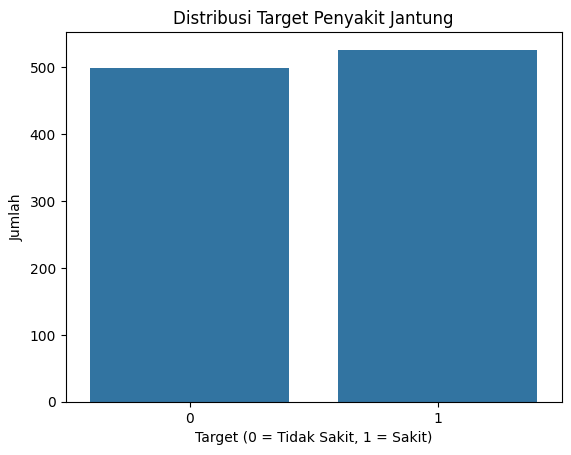

In [ ]:
sns.countplot(x='target', data=df)
plt.title('Distribusi Target Penyakit Jantung')
plt.xlabel('Target (0 = Tidak Sakit, 1 = Sakit)')
plt.ylabel('Jumlah')
plt.show()

### 2.2. Distribusi Fitur Numerik

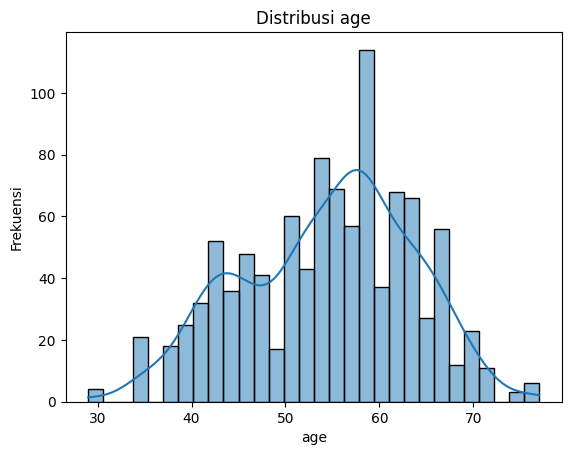

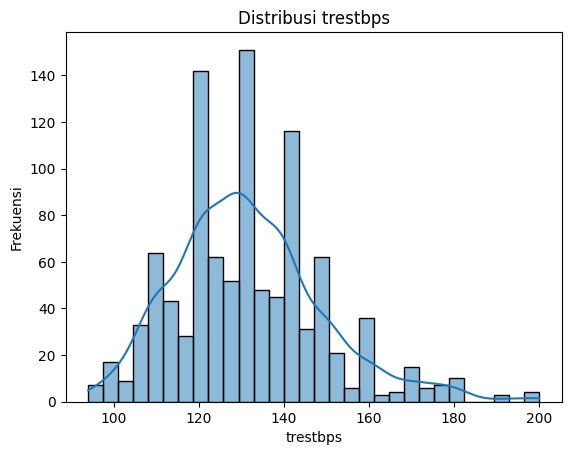

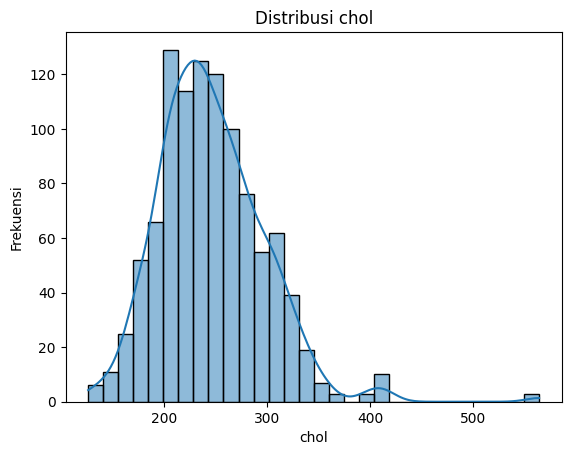

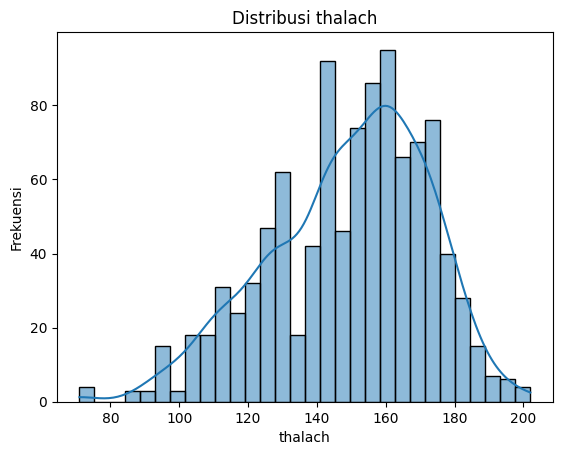

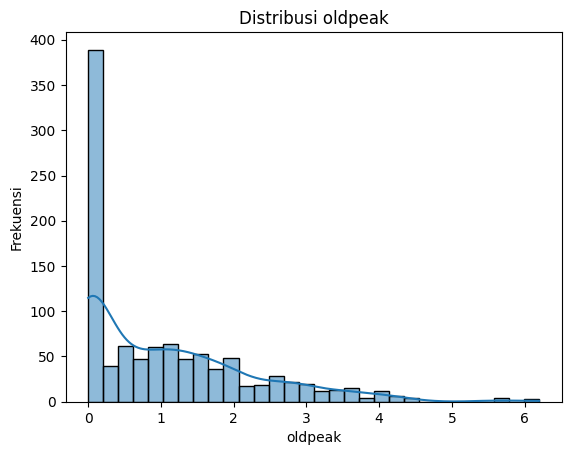

In [ ]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in numeric_features:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

### 2.3. Distribusi Fitur Kategorikal

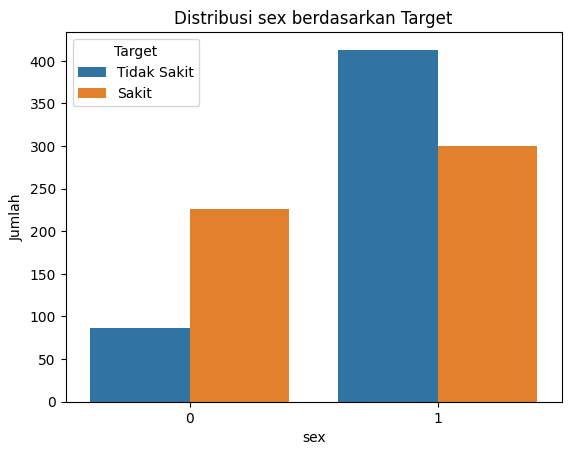

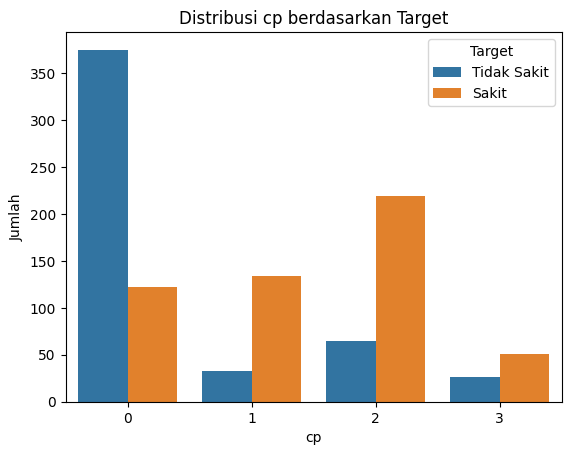

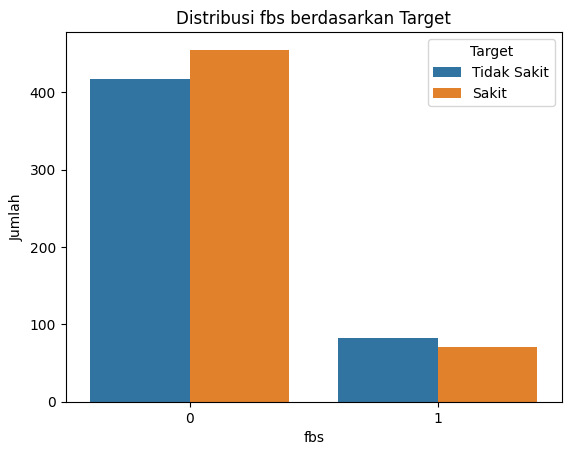

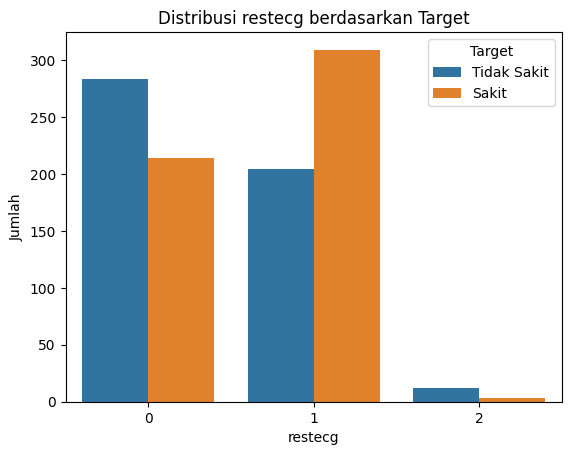

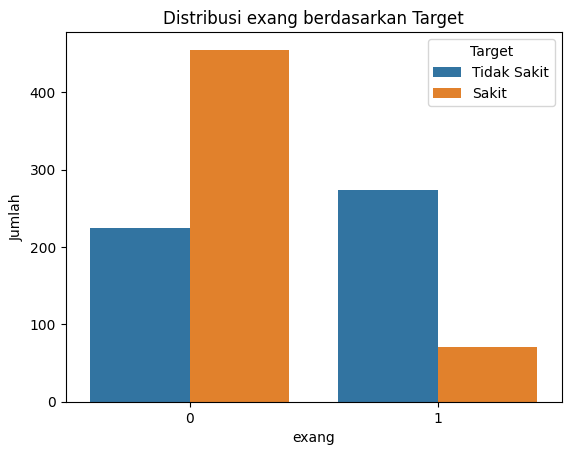

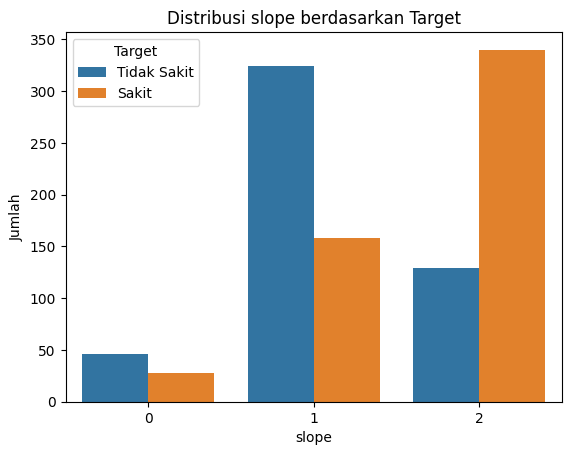

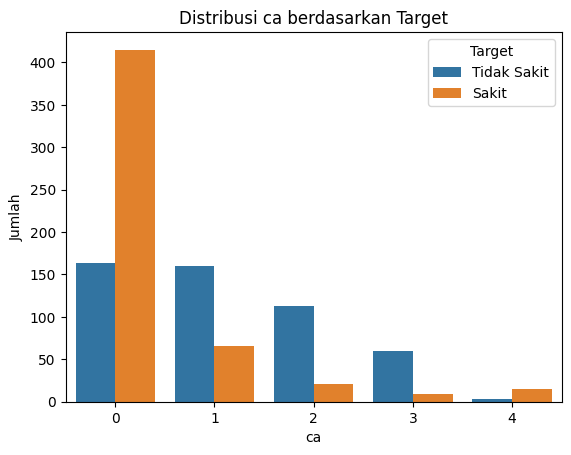

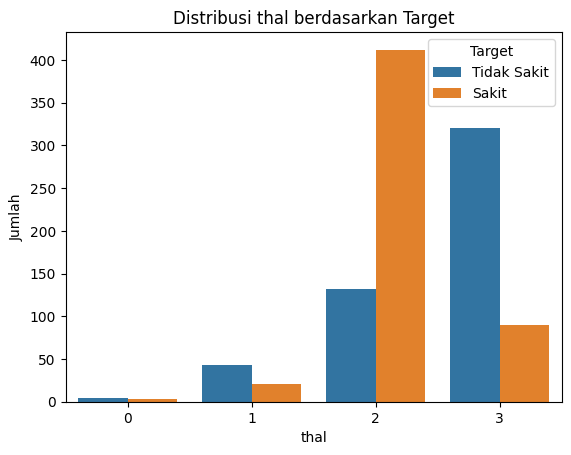

In [ ]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical_features:
    plt.figure()
    sns.countplot(x=col, data=df, hue='target')
    plt.title(f'Distribusi {col} berdasarkan Target')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.legend(title='Target', labels=['Tidak Sakit', 'Sakit'])
    plt.show()

### 2.4. Korelasi Antar Fitur

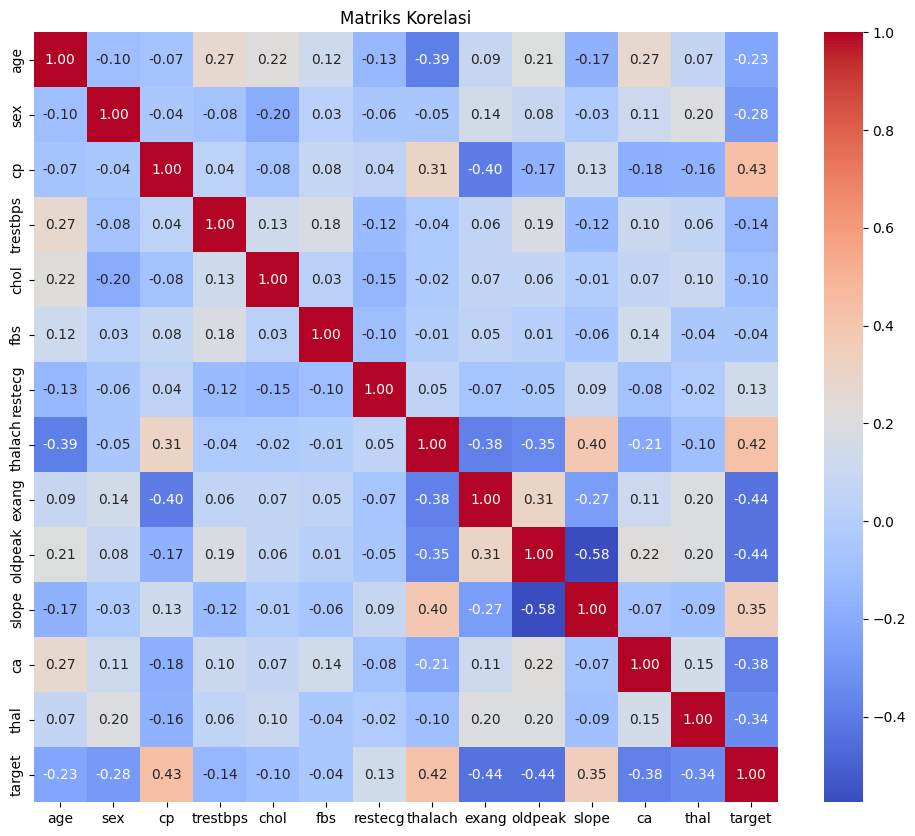

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriks Korelasi")
plt.show()

## 3. Preprocessing

### 3.1. Memisahkan Fitur dan Target

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

### 3.2. Pembagian Data Latih dan Uji

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Ukuran Data:")
print("Train:", X_train.shape)
print("Test :", X_test.shape)

Ukuran Data:
Train: (717, 13)
Test : (308, 13)


### 3.3. Standarisasi Fitur Numerik

In [ ]:
scaler = StandardScaler()

# Terapkan hanya pada data numerik
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi ke DataFrame jika ingin visualisasi atau inspeksi lebih lanjut
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

## 4. Pemodelan

### 4.1. Pembangunan dan Pelatihan Model

In [ ]:
# Inisialisasi model
model = LogisticRegression(max_iter=1000, random_state=42)

# Training model
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Prediksi terhadap data test
y_pred = model.predict(X_test_scaled)

### 4.2. Evaluasi Model

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



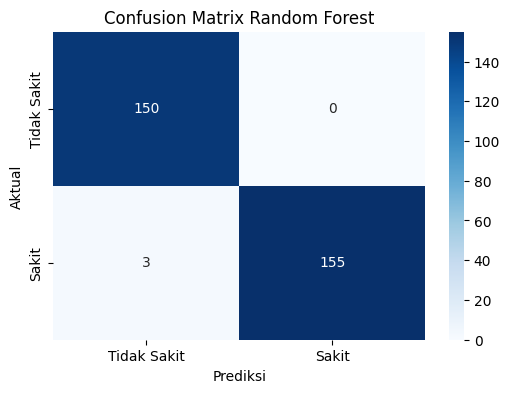

In [ ]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Tidak Sakit', 'Sakit']

# Buat heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

## 5. Diskusi Hasil dan Kesimpulan

### 5.1. Diskusi Hasil

Model yang digunakan adalah **Logistic Regression**, sebuah algoritma linier yang sering dijadikan baseline untuk klasifikasi biner karena sifatnya yang sederhana dan interpretatif.

Berdasarkan hasil evaluasi:

- **Akurasi** model mencapai **99%**, yang menunjukkan performa klasifikasi yang sangat tinggi.

- **Confusion matrix**:

  - Semua **150 pasien yang tidak sakit** diklasifikasikan dengan benar (**true negative**).
  - **155 dari 158 pasien yang sakit** juga diklasifikasikan dengan benar (**true positive**).
  - Hanya terdapat **3 kasus false negative**, yaitu pasien sakit yang tidak terdeteksi.

- **Classification report**:

  - **Kelas 0 (Tidak Sakit)**: precision 0.98, recall 1.00
  - **Kelas 1 (Sakit)**: precision 1.00, recall 0.98
  - F1-score untuk kedua kelas adalah 0.99
  - Macro dan weighted average juga 0.99, menandakan bahwa model bekerja konsisten di seluruh kelas



### 5.2. Kesimpulan

- Logistic Regression terbukti sangat efektif dan akurat pada dataset penyakit jantung ini, dengan hasil evaluasi yang sangat tinggi dan distribusi kesalahan yang minimal.
- Model ini cocok dijadikan **baseline model yang cepat dan efisien** untuk prediksi risiko penyakit jantung.
- Karena Logistic Regression juga **mudah diinterpretasikan**, model ini dapat digunakan dalam sistem klinis di mana **transparansi pengambilan keputusan sangat penting**.

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
# Buat input widgets
age = widgets.IntSlider(min=20, max=90, step=1, description='Age:', value=50)
sex = widgets.Dropdown(options=[('Laki-laki', 1), ('Perempuan', 0)], description='Sex:')
cp = widgets.Dropdown(options=[('Typical Angina', 0), ('Atypical Angina', 1), ('Non-anginal', 2), ('Asymptomatic', 3)], description='Chest Pain:')
trestbps = widgets.IntSlider(min=80, max=200, step=1, description='Rest BP:', value=120)
chol = widgets.IntSlider(min=100, max=600, step=1, description='Chol:', value=240)
fbs = widgets.Dropdown(options=[('<= 120 mg/dl', 0), ('> 120 mg/dl', 1)], description='FBS:')
restecg = widgets.Dropdown(options=[('Normal', 0), ('ST-T abnormality', 1), ('LVH', 2)], description='Rest ECG:')
thalach = widgets.IntSlider(min=60, max=220, step=1, description='Max HR:', value=150)
exang = widgets.Dropdown(options=[('Tidak', 0), ('Ya', 1)], description='Exercise Angina:')
oldpeak = widgets.FloatSlider(min=0.0, max=6.0, step=0.1, description='Oldpeak:', value=1.0)
slope = widgets.Dropdown(options=[('Downsloping', 0), ('Flat', 1), ('Upsloping', 2)], description='Slope:')
ca = widgets.IntSlider(min=0, max=3, step=1, description='CA:', value=0)
thal = widgets.Dropdown(options=[('Normal', 0), ('Fixed Defect', 1), ('Reversible Defect', 2)], description='Thal:')

# Tombol prediksi
predict_button = widgets.Button(description='Prediksi', button_style='success')

# Output area
output = widgets.Output()

# Fungsi prediksi
def predict_disease(btn):
    input_dict = {
        'age': [age.value],
        'sex': [sex.value],
        'cp': [cp.value],
        'trestbps': [trestbps.value],
        'chol': [chol.value],
        'fbs': [fbs.value],
        'restecg': [restecg.value],
        'thalach': [thalach.value],
        'exang': [exang.value],
        'oldpeak': [oldpeak.value],
        'slope': [slope.value],
        'ca': [ca.value],
        'thal': [thal.value]
    }

    input_df = pd.DataFrame(input_dict)
    input_scaled = scaler.transform(input_df)
    pred = model.predict(input_scaled)[0]

    with output:
        clear_output()
        print("Hasil Prediksi:")
        if pred == 1:
            print("Pasien berisiko penyakit jantung.")
        else:
            print("Pasien tidak berisiko penyakit jantung.")

# Event handler
predict_button.on_click(predict_disease)

# Tampilkan form input
form_items = widgets.VBox([
    age, sex, cp, trestbps, chol, fbs, restecg, thalach,
    exang, oldpeak, slope, ca, thal, predict_button, output
])

# Menampilkan form
display(form_items)